In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import calendar
import datetime as dt
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# pd.options.display.float_format = '{:,.2f}'.format

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('../flights_19.csv')
df_20 = pd.read_csv('../flights_20.csv')

In [21]:
#Parsing Dates
# 2019
df['Date'] = pd.to_datetime('2019-01-' + df['DAY_OF_MONTH'].apply(str))
df['day_name'] = df['Date'].dt.day_name()
# 2020
df_20['Date'] = pd.to_datetime('2020-01-' + df_20['DAY_OF_MONTH'].apply(str))
df_20['day_name'] = df_20['Date'].dt.day_name()

In [5]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,Date,day_name,WEEKDAY,timeblk
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,300.0,2019-01-01,Tuesday,Tuesday,6-6:59AM
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,596.0,2019-01-01,Tuesday,Tuesday,2-2:59PM
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,229.0,2019-01-01,Tuesday,Tuesday,12-12:59PM
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,223.0,2019-01-01,Tuesday,Tuesday,3-3:59PM
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,579.0,2019-01-01,Tuesday,Tuesday,7-7:59PM


In [23]:
mapping = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['WEEKDAY'] = df.DAY_OF_WEEK.map(mapping)

# mapping2 = {'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'}
# df['WEEKDAY'] = pd.Categorical(df.DAY_OF_WEEK, categories= mapping2, ordered=True)
# df['DAY_OF_WEEK'] = pd.Categorical(bc['DAY_OF_WEEK'], categories=
#     ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
#     ordered=True)


df.WEEKDAY.describe()

count       583985
unique           7
top       Thursday
freq         99387
Name: WEEKDAY, dtype: object

In [24]:
# df.WEEKDAY.head()
df.WEEKDAY.value_counts(normalize=True)*100
df.WEEKDAY.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [122]:
df.DEP_TIME_BLK.describe()

count        565963
unique           19
top       0600-0659
freq          40616
Name: DEP_TIME_BLK, dtype: object

In [119]:
df.DEP_TIME_BLK.unique()

array(['0600-0659', '1400-1459', '1200-1259', '1500-1559', '1900-1959',
       '0900-0959', '1000-1059', '2000-2059', '1300-1359', '1100-1159',
       '0800-0859', '2200-2259', '1600-1659', '1700-1759', '2100-2159',
       '0700-0759', '1800-1859', '0001-0559', '2300-2359'], dtype=object)

In [150]:
df_20.DEP_TIME_BLK.unique()

array(['1000-1059', '1800-1859', '0600-0659', '1600-1659', '1400-1459',
       '1900-1959', '1100-1159', '0700-0759', '2100-2159', '1500-1559',
       '0900-0959', '1700-1759', '1200-1259', '0800-0859', '0001-0559',
       '2000-2059', '1300-1359', '2200-2259', '2300-2359'], dtype=object)

In [128]:
maptimeblk = {
            '0001-0559':'1AM-5:59AM',
            '0600-0659':'6-6:59AM',
            '0700-0759':'7-7:59AM',
            '0800-0859':'8-8:59AM',
            '0900-0959':'9-9:59AM',
            '1000-1059':'10-10:59AM',
            '1100-1159':'11-11:59AM',
            '1200-1259':'12-12:59PM',
            '1300-1359':'1-1:59PM',
            '1400-1459':'2-2:59PM', 
            '1500-1559':'3-3:59PM',
            '1600-1659':'4-4:59PM',
            '1700-1759':'5-5:59PM',
            '1800-1859':'6-6:59PM',
            '1900-1959':'7-7:59PM',
            '2000-2059':'8-8:59PM',
            '2100-2159':'9-9:59PM',
            '2200-2259':'10-10:59PM',
            '2300-2359':'11-11:59PM'
             }
df['timeblk'] = df.DEP_TIME_BLK.map(maptimeblk)


df.timeblk.describe()

count       565963
unique          19
top       6-6:59AM
freq         40616
Name: timeblk, dtype: object

In [162]:
# df.drop('timeblk2', axis=1, inplace=True)

In [151]:
maptimeblk2 = {
            '0001-0559':'1AM-5:59AM',
            '0600-0659':'6-6:59AM',
            '0700-0759':'7-7:59AM',
            '0800-0859':'8-8:59AM',
            '0900-0959':'9-9:59AM',
            '1000-1059':'10-10:59AM',
            '1100-1159':'11-11:59AM',
            '1200-1259':'12-12:59PM',
            '1300-1359':'1-1:59PM',
            '1400-1459':'2-2:59PM', 
            '1500-1559':'3-3:59PM',
            '1600-1659':'4-4:59PM',
            '1700-1759':'5-5:59PM',
            '1800-1859':'6-6:59PM',
            '1900-1959':'7-7:59PM',
            '2000-2059':'8-8:59PM',
            '2100-2159':'9-9:59PM',
            '2200-2259':'10-10:59PM',
            '2300-2359':'11-11:59PM'
             }
df_20['timeblk'] = df_20.DEP_TIME_BLK.map(maptimeblk2)


df_20.timeblk.describe()

count       599268
unique          19
top       6-6:59AM
freq         43742
Name: timeblk, dtype: object

In [8]:

mapping20 = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df_20['WEEKDAY'] = df_20.DAY_OF_WEEK.map(mapping20)


df_20.WEEKDAY.describe()

count     607346
unique         7
top       Friday
freq      103812
Name: WEEKDAY, dtype: object

In [25]:
df.WEEKDAY.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [133]:
df_20.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,Date,day_name
0,1,3,EV,ORD,GRB,1003.0,0.0,1000-1059,1117.0,0.0,174.0,2020-01-01,Wednesday
1,1,3,EV,TUL,ORD,1027.0,0.0,1000-1059,1216.0,0.0,585.0,2020-01-01,Wednesday
2,1,3,EV,EWR,TYS,1848.0,0.0,1800-1859,2120.0,0.0,631.0,2020-01-01,Wednesday
3,1,3,EV,BTR,IAH,1846.0,0.0,1800-1859,2004.0,0.0,253.0,2020-01-01,Wednesday
4,1,3,EV,RIC,IAH,1038.0,0.0,1000-1059,1330.0,0.0,1157.0,2020-01-01,Wednesday


In [152]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599268 entries, 0 to 607345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DAY_OF_MONTH  599268 non-null  int64         
 1   DAY_OF_WEEK   599268 non-null  int64         
 2   OP_CARRIER    599268 non-null  object        
 3   ORIGIN        599268 non-null  object        
 4   DEST          599268 non-null  object        
 5   DEP_TIME      599268 non-null  float64       
 6   DEP_DEL15     599268 non-null  float64       
 7   DEP_TIME_BLK  599268 non-null  object        
 8   ARR_TIME      599268 non-null  float64       
 9   ARR_DEL15     599268 non-null  float64       
 10  DISTANCE      599268 non-null  float64       
 11  Date          599268 non-null  datetime64[ns]
 12  day_name      599268 non-null  object        
 13  timeblk       599268 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 

## Check missing values, Drop nulls, empty and columns not useful for analysis

In [132]:
# df.drop(['Unnamed: 21', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'CANCELLED', 'DIVERTED'], axis=1, inplace=True)
# df.dropna(inplace=True)
# df_20.drop(['Unnamed: 21', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'CANCELLED', 'DIVERTED'], axis=1, inplace=True)
# df_20.dropna(inplace=True)
# df.drop(['Unnamed: 21'], axis=1, inplace=True)
# df_20.dropna(inplace=True)
# df.dropna(subset=['TAIL_NUM', inplace=True])

In [39]:
df.isna().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_DEL15       0
DEP_TIME_BLK    0
ARR_TIME        0
ARR_DEL15       0
DISTANCE        0
Date            0
day_name        0
WEEKDAY         0
dtype: int64

In [34]:
# df.dropna(inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DAY_OF_MONTH  565963 non-null  int64         
 1   DAY_OF_WEEK   565963 non-null  int64         
 2   OP_CARRIER    565963 non-null  object        
 3   ORIGIN        565963 non-null  object        
 4   DEST          565963 non-null  object        
 5   DEP_TIME      565963 non-null  float64       
 6   DEP_DEL15     565963 non-null  float64       
 7   DEP_TIME_BLK  565963 non-null  object        
 8   ARR_TIME      565963 non-null  float64       
 9   ARR_DEL15     565963 non-null  float64       
 10  DISTANCE      565963 non-null  float64       
 11  Date          565963 non-null  datetime64[ns]
 12  day_name      565963 non-null  object        
 13  WEEKDAY       565963 non-null  object        
 14  timeblk       565963 non-null  object        
dtypes: datetime64[ns]

In [182]:
df.DAY_OF_MONTH.describe()

count    565963.000000
mean         15.782154
std           8.960357
min           1.000000
25%           8.000000
50%          16.000000
75%          24.000000
max          31.000000
Name: DAY_OF_MONTH, dtype: float64

In [64]:
df.DEP_DEL15.value_counts(normalize=True)*100

0.0    82.63049
1.0    17.36951
Name: DEP_DEL15, dtype: float64

In [33]:
df.OP_UNIQUE_CARRIER.value_counts()

WN    111312
AA     77017
DL     73836
OO     64926
UA     46915
YX     25755
MQ     25699
B6     24443
OH     23169
AS     20744
9E     20198
YV     18346
NK     15222
EV     13195
F9      9647
HA      6798
G4      6763
Name: OP_UNIQUE_CARRIER, dtype: int64

In [189]:
totaldelays19 = df.DEP_DEL15.sum()
totaldelays19

98305.0

In [191]:
totaldelays20 = df_20.DEP_DEL15.sum()
totaldelays20

81447.0

In [177]:
top5 = df.groupby('OP_CARRIER')['DEP_DEL15'].sum().sort_values(ascending=False).head(5)
top5.sum() / totaldelays *100

61.85850160215656

In [28]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,0.0
mean,15.960088,3.835626,1331.957814,0.174281,1484.315921,0.185917,797.742767,NaN
std,8.987942,1.921899,495.404020,0.379351,523.162855,0.389040,589.999261,NaN
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,921.000000,0.000000,1104.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,1328.000000,0.000000,1517.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,1738.000000,0.000000,1919.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,2400.000000,1.000000,2400.000000,1.000000,4983.000000,NaN


In [43]:
df.OP_CARRIER.unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [51]:
(df.OP_CARRIER.values != df.OP_UNIQUE_CARRIER.values).sum()

0

In [45]:
df.OP_UNIQUE_CARRIER.describe()

count     583985
unique        17
top           WN
freq      111312
Name: OP_UNIQUE_CARRIER, dtype: object

In [21]:
# #Transform data types for 2019
# cols = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
# for col in cols:
#   df[col] = df[col].astype('category') 

# #Discretization
df['DISTANCE_cat'] = pd.qcut(df['DISTANCE'], q=4)

In [22]:
# #Transform data types for 2020
# cols20 = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
# for col in cols20:
#   df_20[col] = df_20[col].astype('category') 

# #Discretization
df_20['DISTANCE_cat'] = pd.qcut(df_20['DISTANCE'], q=4)

#### Check null values

In [53]:
# df.isnull().any()

In [19]:
# df.isnull().sum()

In [24]:
# pd.Series([i for i in df.TAIL_NUM]).value_counts()
df.TAIL_NUM.value_counts()

N488HA    361
N481HA    348
N483HA    346
N489HA    344
N493HA    328
         ... 
N504DN      1
N662UA      1
N35953      1
N706DN      1
N795UA      1
Name: TAIL_NUM, Length: 5441, dtype: int64

In [113]:
df.DEP_DEL15.value_counts()

0.0    467658
1.0     98305
Name: DEP_DEL15, dtype: int64

In [36]:
468703 / df.DEP_DEL15.value_counts().sum()

0.8281513102446626

In [12]:
df.TAIL_NUM.describe()

count     581442
unique      5446
top       N488HA
freq         361
Name: TAIL_NUM, dtype: object

In [8]:
# df.loc[df.DEP_DEL15.isnull(), 'DEP_DEL15'] = 0

### Dropna()

In [37]:
# nulls < 5%, just drop nulls
# Which better?
# df.dropna(subset=['TAIL_NUM','DEP_TIME','DEP_DEL15','ARR_TIME','ARR_DEL15', inplace=True])
# df.dropna(inplace=True)

In [28]:
# df.TAIL_NUM.isnull().sum() / len(df) *100

In [29]:
# df.DEP_DEL15.isnull().sum() / len(df)

In [30]:
# df.DEP_TIME.isnull().sum() / len(df)

In [31]:
# df.ARR_TIME.isnull().sum() / len(df) * 100

In [32]:
# df.ARR_DEL15.isnull().sum() / len(df) * 100

In [14]:
#### Should I change datatypes to objects or categories?

In [44]:
#### use day of week, day of month, airport, airline to predict delays

In [35]:
df.groupby('day_name')['DEP_DEL15'].sum()
#sum sums the 1s, count counts 0s and 1s (counting the number of flights)

day_name
Friday       13523.0
Monday       13485.0
Saturday      8766.0
Sunday       12493.0
Thursday     19029.0
Tuesday      14251.0
Wednesday    16758.0
Name: DEP_DEL15, dtype: float64

In [40]:
df.loc[df['day_name']=='Friday']['DISTANCE'].mean()

796.418630966003

In [43]:
# get delays by avg distance



# of flights not delayed, what's avg distance? and flights delayed what's avg distance?





In [143]:
df.loc[df['DEP_DEL15']==1.0]['DEP_DEL15'].count()

98305

In [44]:
df.DEP_DEL15.sum()/df.DEP_DEL15.count()

0.17369510020973103

In [46]:
df.DEP_DEL15.value_counts(normalize=True)

0.0    0.826305
1.0    0.173695
Name: DEP_DEL15, dtype: float64

In [55]:
# Concentration of delays by carrier
# del_carr = df[['OP_CARRIER','DEP_DEL15']].groupby('OP_CARRIER').sum().sort_values(by='DEP_DEL15',ascending=False)
# del_carr['PERCENTUAL'] = del_carr['DEP_DEL15']/(del_carr['DEP_DEL15'].sum())*100
# del_carr

,DEP_DEL15,PERCENTUAL
OP_CARRIER,,
WN,18466.0,18.784396
OO,12580.0,12.796908
AA,11993.0,12.199786
DL,9413.0,9.575301
UA,8358.0,8.502111
B6,6321.0,6.429988
YX,4790.0,4.872590
MQ,4694.0,4.774935
9E,3729.0,3.793296


### AVG delays by carrier 2019
- Top 5 +20%

In [50]:
avg_del19 = df[['OP_CARRIER','DEP_DEL15']].groupby('OP_CARRIER').sum()
avg_del19['PERCENTAGE'] = (avg_del19['DEP_DEL15'] / df.groupby('OP_CARRIER')['DEP_DEL15'].count()*100)
avg_del19 = avg_del19.sort_values(by='PERCENTAGE', ascending=False)
avg_del19.sum()

DEP_DEL15     98305.000000
PERCENTAGE      303.741605
dtype: float64

<AxesSubplot:ylabel='OP_CARRIER'>

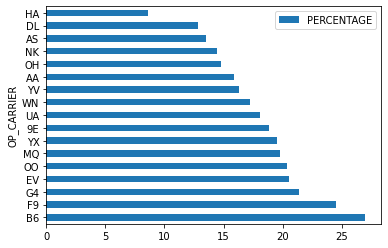

In [116]:
avg_del19.reset_index().plot(x='OP_CARRIER',y='PERCENTAGE',kind='barh')

### AVG delays by carrier 2020

In [48]:
avg_del20 = df_20[['OP_CARRIER','DEP_DEL15']].groupby('OP_CARRIER').sum()
avg_del20['PERCENTAGE'] = (avg_del20['DEP_DEL15'] / df.groupby('OP_CARRIER')['DEP_DEL15'].count()*100)
avg_del20 = avg_del20.sort_values(by='PERCENTAGE', ascending=False)
avg_del20.sum()

DEP_DEL15     81884.000000
PERCENTAGE      259.034289
dtype: float64

### delays decreased 16.7% from Jan 2019 and Jan 2020

In [55]:
(1-(avg_del20.sum()/avg_del19.sum()))*100

DEP_DEL15     16.704135
PERCENTAGE    14.718865
dtype: float64

<AxesSubplot:ylabel='OP_CARRIER'>

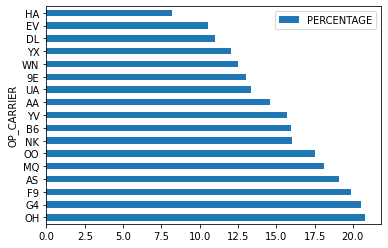

In [115]:
avg_del20.reset_index().plot(x='OP_CARRIER',y='PERCENTAGE',kind='barh')

### Delays by Origin 2019

In [56]:
orig_del19 = df[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum()
orig_del19['PERCENTAGE'] = (orig_del19['DEP_DEL15'] / df.groupby('ORIGIN')['DEP_DEL15'].count()*100)
orig_del19 = orig_del19.sort_values(by='PERCENTAGE', ascending=False).head(20)
orig_del19

,DEP_DEL15,PERCENTAGE
ORIGIN,,
HGR,7.0,70.000000
OGS,6.0,60.000000
OGD,4.0,50.000000
LCK,19.0,46.341463
ASE,318.0,38.733252
SCK,20.0,38.461538
ART,18.0,38.297872
VEL,17.0,36.956522
MMH,27.0,36.486486


### Delays by Origin 2020

In [100]:
orig_del20 = df_20[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum()
orig_del20['PERCENTAGE'] = (orig_del20['DEP_DEL15'] / df_20.groupby('ORIGIN')['DEP_DEL15'].count()*100)
orig_del20 = orig_del20.sort_values(by='PERCENTAGE', ascending=False).head(20)
orig_del20

,DEP_DEL15,PERCENTAGE
ORIGIN,,
OGD,3.0,33.333333
PPG,3.0,33.333333
OTH,7.0,33.333333
ADK,3.0,33.333333
ASE,247.0,30.456227
PSM,6.0,30.000000
OGS,14.0,29.787234
RIW,14.0,29.166667
SUX,30.0,28.301887


### Delays by destination 2019

In [85]:
dest_del19 = df[['DEST','DEP_DEL15']].groupby('DEST').sum()
dest_del19['PERCENTAGE'] = (dest_del19['DEP_DEL15'] / df.groupby('DEST')['DEP_DEL15'].count()*100)
dest_del19 = dest_del19.sort_values(by='PERCENTAGE', ascending=False).head(20)
dest_del19

,DEP_DEL15,PERCENTAGE
DEST,,
MKG,22.0,46.808511
HGR,4.0,40.000000
MMH,29.0,38.666667
PIB,23.0,38.333333
OGD,3.0,37.500000
HTS,7.0,35.000000
PSE,21.0,33.870968
AZA,149.0,32.964602
EAU,17.0,32.692308


### Delays by destination 2020

In [97]:
dest_del20 = df_20[['DEST','DEP_DEL15']].groupby('DEST').sum()
dest_del20['PERCENTAGE'] = (dest_del20['DEP_DEL15'] / df_20.groupby('DEST')['DEP_DEL15'].count()*100)
dest_del20 = dest_del20.sort_values(by='PERCENTAGE', ascending=False).head(20)
dest_del20

,DEP_DEL15,PERCENTAGE
DEST,,
OTH,10.0,47.619048
ADQ,18.0,36.000000
IMT,17.0,30.909091
OGS,15.0,30.612245
ASE,250.0,29.069767
MEI,17.0,28.333333
LYH,23.0,27.710843
CAK,130.0,27.027027
AZA,130.0,26.694045


### Busiest destinations (most delays)

In [121]:
dest_sum_del19 = df[['DEST','DEP_DEL15']].groupby('DEST').sum().sort_values(by='DEP_DEL15',ascending=False).head(20)
dest_sum_del19

,DEP_DEL15
DEST,
ORD,5488.0
LGA,4188.0
ATL,3698.0
SFO,3506.0
DFW,3463.0
EWR,3216.0
DEN,3001.0
LAX,2935.0
BOS,2575.0


In [96]:
dest_sum_del20 = df_20[['DEST','DEP_DEL15']].groupby('DEST').sum().sort_values(by='DEP_DEL15',ascending=False).head(20)
dest_sum_del20

,DEP_DEL15
DEST,
DFW,3811.0
ORD,3547.0
ATL,3353.0
CLT,2785.0
SFO,2442.0
DEN,2441.0
LAX,2300.0
EWR,2210.0
LGA,2127.0


### Total delays by ORIGIN 2019

In [101]:
org_sum_del19 = df[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False).head(20)
org_sum_del19

,DEP_DEL15
ORIGIN,
ORD,6560.0
ATL,4118.0
DFW,4028.0
LGA,3775.0
DEN,3415.0
LAX,3017.0
SFO,2967.0
CLT,2671.0
EWR,2532.0


### Total delays by ORIGIN 2020

In [102]:
org_sum_del20 = df_20[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False).head(20)
org_sum_del20

,DEP_DEL15
ORIGIN,
DFW,4531.0
ORD,4079.0
ATL,3619.0
CLT,3046.0
DEN,2739.0
LAX,2377.0
SFO,2313.0
SEA,2264.0
EWR,2001.0


In [87]:
df.groupby('DEST')['DEP_DEL15'].sum().sort_values(ascending=False)

DEST
ORD    5488.0
LGA    4188.0
ATL    3698.0
SFO    3506.0
DFW    3463.0
        ...  
ADK       1.0
CPR       1.0
SMX       1.0
PPG       1.0
STC       0.0
Name: DEP_DEL15, Length: 346, dtype: float64

In [63]:
# avg carrier delays 2019
# avg_del19 = (df.groupby('OP_CARRIER')['DEP_DEL15'].sum() / df.groupby('OP_CARRIER')['DEP_DEL15'].count() * 100).sort_values(ascending=False)
# avg_del19

OP_CARRIER
B6    27.018594
F9    24.552160
G4    21.437108
EV    20.565574
OO    20.365873
MQ    19.797554
YX    19.496113
9E    18.813380
UA    18.119932
WN    17.220124
YV    16.276852
AA    15.915545
OH    14.757030
NK    14.438004
AS    13.522075
DL    12.823727
HA     8.621960
Name: DEP_DEL15, dtype: float64

In [64]:
# avg carrier delays 2020
avg_del20 = (df_20.groupby('OP_CARRIER')['DEP_DEL15'].sum() / df_20.groupby('OP_CARRIER')['DEP_DEL15'].count() * 100).sort_values(ascending=False)
avg_del20

OP_CARRIER
OH    19.321638
AS    18.442958
G4    17.865066
MQ    16.820914
YV    15.893092
OO    15.467403
F9    15.285900
B6    15.084684
AA    14.516642
NK    13.794496
UA    12.774110
WN    12.376054
EV    12.268697
9E    11.174036
YX    10.254631
DL    10.096587
HA     7.940128
Name: DEP_DEL15, dtype: float64

In [48]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Date', 'day_name', 'DISTANCE_cat'],
      dtype='object')

In [144]:
# aggregating multiple fields for each Week
# why do I get different numbers? sum = flights delayed (1s), count = every flight
df.resample('W', on='Date').agg({'DEP_DEL15':'sum', 'ARR_DEL15':'sum'})

,DEP_DEL15,ARR_DEL15
Date,,
2019-01-06,"21,561.00","21,588.00"
2019-01-13,"16,688.00","18,013.00"
2019-01-20,"19,901.00","22,454.00"
2019-01-27,"27,529.00","30,089.00"
2019-02-03,"12,626.00","13,078.00"


In [26]:
df_20.groupby('day_name')['DEP_DEL15'].sum()

day_name
Friday       15703.0
Monday       11125.0
Saturday     12403.0
Sunday       11292.0
Thursday     13879.0
Tuesday       7526.0
Wednesday     9519.0
Name: DEP_DEL15, dtype: float64

In [153]:
# data re-sampled based on an each week, just change the frequency
delays19 = df.resample('W', on='Date').DEP_DEL15.sum()
delays19

Date
2019-01-06   21,561.00
2019-01-13   16,688.00
2019-01-20   19,901.00
2019-01-27   27,529.00
2019-02-03   12,626.00
Freq: W-SUN, Name: DEP_DEL15, dtype: float64

### the evening hours between 4-7pm most delays, what % of total delays for evening or afternoon?

In [148]:
# Concentration of delays due to 'DEP_TIME_BLK'?
time_blk = df[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk['PERCENTAGE'] = time_blk['ARR_DEL15']/(time_blk['ARR_DEL15'].sum())*100
time_blk

,ARR_DEL15,PERCENTAGE
DEP_TIME_BLK,,
1700-1759,8270.0,7.859573
1800-1859,7978.0,7.582065
1600-1659,7576.0,7.200015
1400-1459,7290.0,6.928209
1500-1559,7281.0,6.919656
1900-1959,7219.0,6.860733
1200-1259,6639.0,6.309517
1300-1359,6398.0,6.080477
1100-1159,6361.0,6.045314


<AxesSubplot:xlabel='Date'>

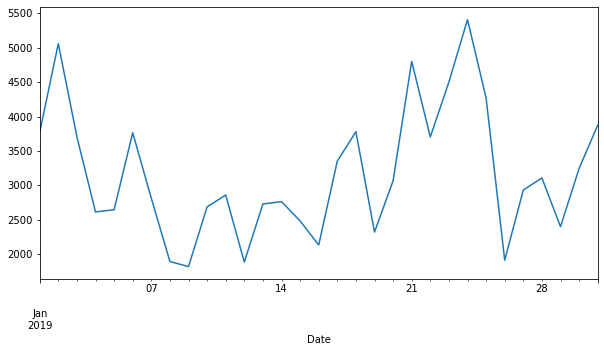

In [58]:
plt.figure(figsize=(10,5))
df.resample('D', on='Date').DEP_DEL15.sum().plot()

<AxesSubplot:xlabel='Date'>

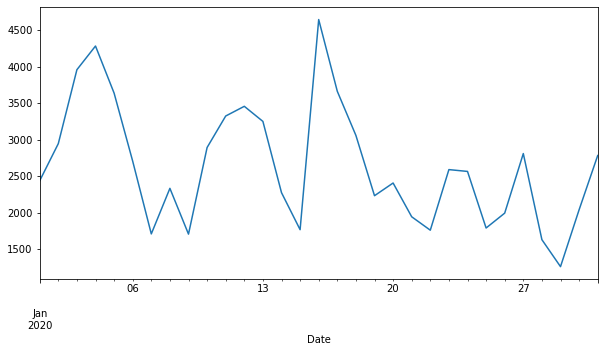

In [60]:
# data re-sampled based on an each week, just change the frequency
plt.figure(figsize=(10,5))
delays20 = df_20.resample('D', on='Date').DEP_DEL15.sum()
delays20.plot()

In [122]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599268 entries, 0 to 607345
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DAY_OF_MONTH           599268 non-null  int64         
 1   DAY_OF_WEEK            599268 non-null  int64         
 2   OP_UNIQUE_CARRIER      599268 non-null  object        
 3   OP_CARRIER_AIRLINE_ID  599268 non-null  int64         
 4   OP_CARRIER             599268 non-null  object        
 5   TAIL_NUM               599268 non-null  object        
 6   OP_CARRIER_FL_NUM      599268 non-null  int64         
 7   ORIGIN_AIRPORT_ID      599268 non-null  int64         
 8   ORIGIN_AIRPORT_SEQ_ID  599268 non-null  int64         
 9   ORIGIN                 599268 non-null  object        
 10  DEST_AIRPORT_ID        599268 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    599268 non-null  int64         
 12  DEST                   599268 non-null  obje

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DAY_OF_MONTH  565963 non-null  int64         
 1   DAY_OF_WEEK   565963 non-null  int64         
 2   OP_CARRIER    565963 non-null  object        
 3   ORIGIN        565963 non-null  object        
 4   DEST          565963 non-null  object        
 5   DEP_TIME      565963 non-null  float64       
 6   DEP_DEL15     565963 non-null  float64       
 7   DEP_TIME_BLK  565963 non-null  object        
 8   ARR_TIME      565963 non-null  float64       
 9   ARR_DEL15     565963 non-null  float64       
 10  DISTANCE      565963 non-null  float64       
 11  Date          565963 non-null  datetime64[ns]
 12  day_name      565963 non-null  object        
 13  WEEKDAY       565963 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 

In [153]:
# df.to_csv('flights_19.csv', index=False)
# df_20.to_csv('flights_20.csv', index=False)

In [33]:
# DEP_DEL15 ~ ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
#        'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
#        'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
#        , 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15',
#        'DIVERTED', 'DISTANCE']

In [34]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

<AxesSubplot:>

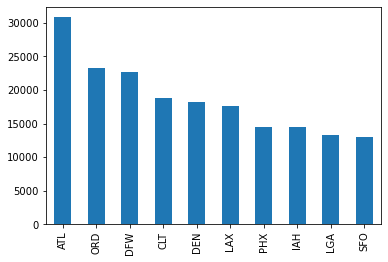

In [88]:
df.DEST.value_counts().head(10).plot(kind='bar')


<AxesSubplot:ylabel='DEST'>

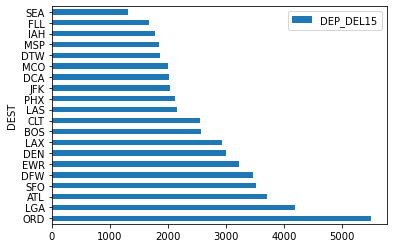

In [186]:
### create a mask for the top dest with delays
top_dest = df.groupby('DEST')['DEP_DEL15'].sum().sort_values(ascending=False).head(20)
top_dest = pd.DataFrame(data=top_dest).reset_index()
top_dest.plot('DEST', kind='barh')

In [176]:
# Grouping data
df.groupby([pd.Grouper(key='Date', freq='M'), 'OP_CARRIER']).DEP_DEL15.sum().head(15).sort_values(ascending=False)

Date        OP_CARRIER
2019-01-31  WN           18,466.00
            OO           12,580.00
            AA           11,993.00
            DL            9,413.00
            UA            8,358.00
            B6            6,321.00
            MQ            4,694.00
            9E            3,729.00
            OH            3,301.00
            AS            2,732.00
            EV            2,509.00
            F9            2,330.00
            NK            2,167.00
            G4            1,435.00
            HA              585.00
Name: DEP_DEL15, dtype: float64

In [177]:
# Grouping data based on month and store type
df_20.groupby([pd.Grouper(key='Date', freq='M'), 'OP_CARRIER']).DEP_DEL15.sum().head(15).sort_values(ascending=False)

Date        OP_CARRIER
2020-01-31  WN           13,330.00
            AA           10,956.00
            OO           10,750.00
            DL            8,070.00
            UA            6,134.00
            OH            4,637.00
            MQ            4,253.00
            AS            3,833.00
            B6            3,714.00
            9E            2,565.00
            NK            2,391.00
            F9            1,882.00
            G4            1,369.00
            EV            1,273.00
            HA              557.00
Name: DEP_DEL15, dtype: float64

<AxesSubplot:xlabel='DEST', ylabel='DEP_DEL15'>

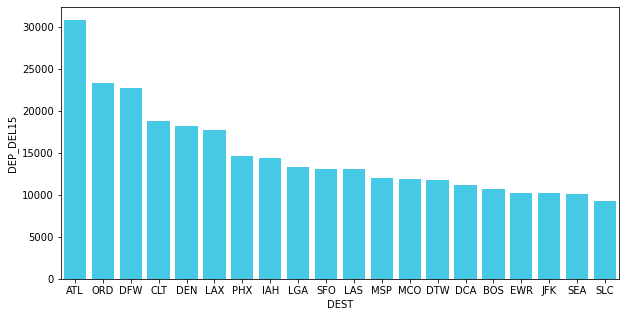

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x='DEST', y='DEP_DEL15', data=top_dest, color='#2ADAFF')

In [109]:
df.DEST.unique()

array(['ATL', 'CVG', 'FSM', 'MSP', 'LGA', 'BMI', 'DAY', 'DTW', 'RIC',
       'EWR', 'AGS', 'OAJ', 'GNV', 'EYW', 'CWA', 'CAE', 'MGM', 'BNA',
       'LNK', 'TVC', 'PIA', 'BHM', 'AVP', 'LAN', 'TYS', 'PIT', 'JAX',
       'GTR', 'BOS', 'MSN', 'JFK', 'DSM', 'EVV', 'MDT', 'OMA', 'AVL',
       'SHV', 'ILM', 'EWN', 'GTF', 'RDU', 'LEX', 'ABE', 'SDF', 'MYR',
       'PWM', 'SYR', 'CSG', 'ELM', 'HSV', 'TUL', 'GRB', 'TLH', 'CRW',
       'TRI', 'LIT', 'GRR', 'IND', 'GPT', 'GSO', 'CHA', 'IAD', 'JAN',
       'ROC', 'TPA', 'CLE', 'AEX', 'BUF', 'CHO', 'BWI', 'BTV', 'HRL',
       'PHF', 'CHS', 'ORF', 'SAV', 'SAT', 'LAX', 'SJC', 'DFW', 'ORD',
       'SEA', 'PHX', 'MIA', 'PHL', 'SFO', 'STL', 'CLT', 'SJU', 'DCA',
       'MCO', 'TUS', 'ALB', 'FLL', 'AUS', 'EGE', 'HNL', 'OGG', 'IAH',
       'LAS', 'KOA', 'MSY', 'SAN', 'PDX', 'BOI', 'ATW', 'SPS', 'SLC',
       'FAT', 'JAC', 'MCI', 'PNS', 'ELP', 'SNA', 'ABQ', 'GSP', 'DEN',
       'RNO', 'MHT', 'ABI', 'DRT', 'CMH', 'BIL', 'CLL', 'ALO', 'SUX',
       'SGF', 'CID',

<AxesSubplot:xlabel='OP_CARRIER', ylabel='count'>

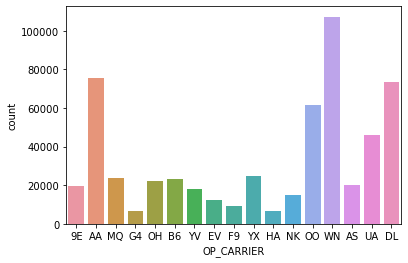

In [61]:
sns.countplot('OP_CARRIER', data=df)

<AxesSubplot:xlabel='OP_CARRIER', ylabel='count'>

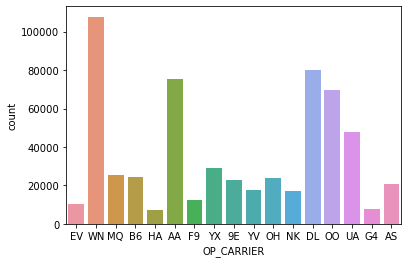

In [149]:
sns.countplot('OP_CARRIER', data=df_20)

In [ ]:
## delay by airline

<AxesSubplot:xlabel='OP_CARRIER', ylabel='count'>

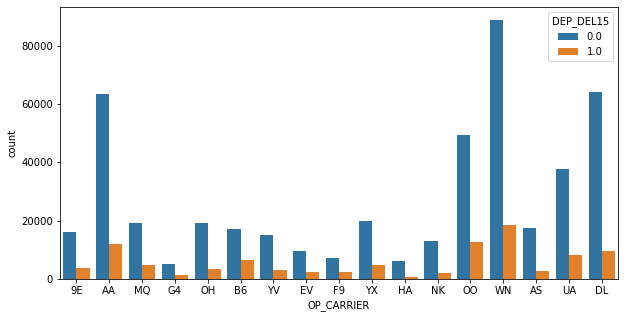

In [68]:
plt.figure(figsize=(10,5))
sns.countplot('OP_CARRIER', data=df, hue='DEP_DEL15')

<AxesSubplot:xlabel='day_name', ylabel='count'>

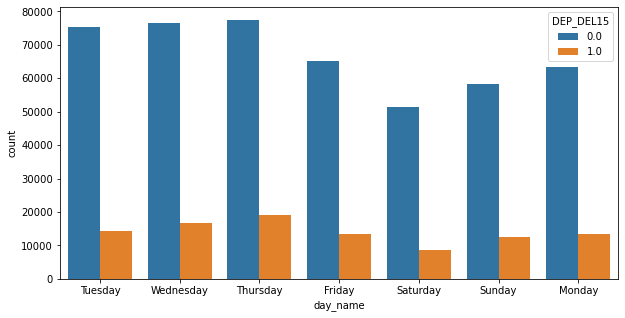

In [179]:
plt.figure(figsize=(10,5))
sns.countplot('day_name', data=df, hue='DEP_DEL15')

<AxesSubplot:xlabel='OP_CARRIER', ylabel='count'>

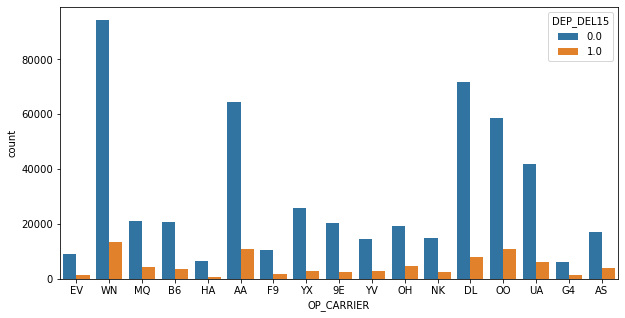

In [150]:
plt.figure(figsize=(10,5))
sns.countplot('OP_CARRIER', data=df_20, hue='DEP_DEL15')

<AxesSubplot:xlabel='day_name', ylabel='count'>

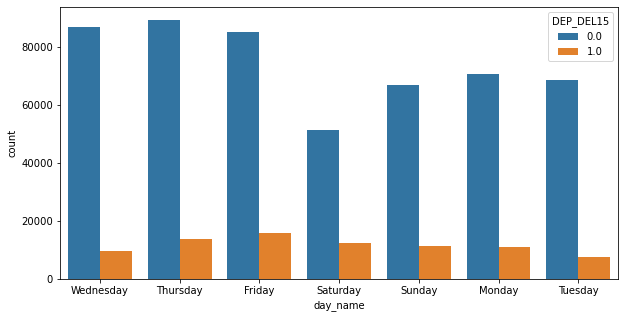

In [178]:
plt.figure(figsize=(10,5))
sns.countplot('day_name', data=df_20, hue='DEP_DEL15')

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

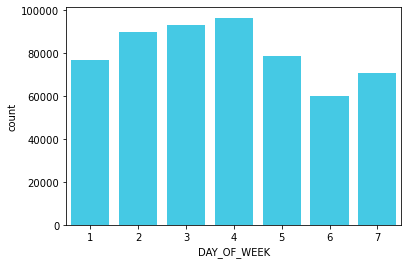

In [46]:
sns.countplot('DAY_OF_WEEK', data=df, color='#2ADAFF')

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

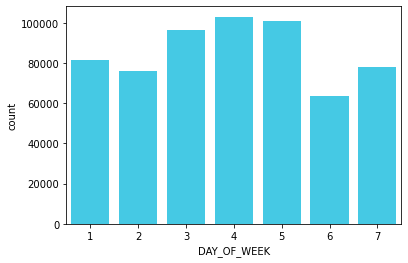

In [151]:
sns.countplot('DAY_OF_WEEK', data=df_20, color='#2ADAFF')

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER', ylabel='count'>

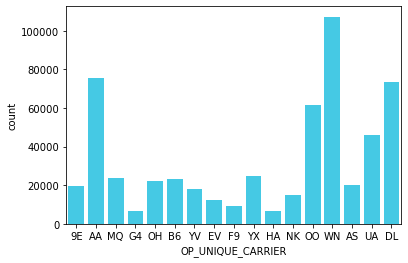

In [47]:
sns.countplot('OP_UNIQUE_CARRIER', data=df, color='#2ADAFF')

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER', ylabel='count'>

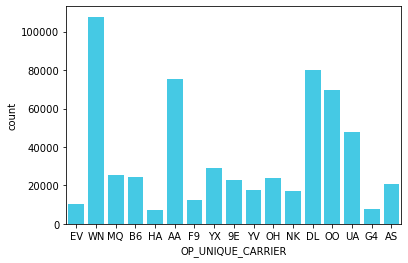

In [152]:
sns.countplot('OP_UNIQUE_CARRIER', data=df_20, color='#2ADAFF')

(array([2.24974e+05, 1.92825e+05, 8.19030e+04, 3.32470e+04, 2.25610e+04,
        9.49900e+03, 2.54000e+02, 3.83000e+02, 1.12000e+02, 2.05000e+02]),
 array([  31. ,  526.2, 1021.4, 1516.6, 2011.8, 2507. , 3002.2, 3497.4,
        3992.6, 4487.8, 4983. ]),
 <BarContainer object of 10 artists>)

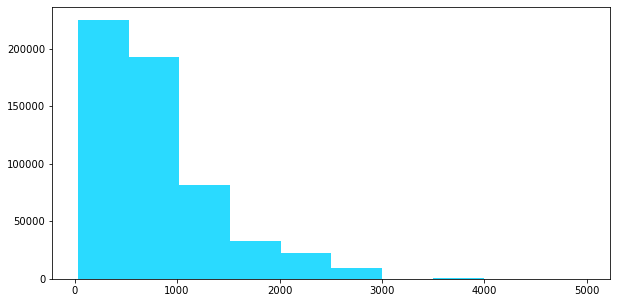

In [51]:
plt.figure(figsize=(10,5))
plt.hist('DISTANCE', data=df, color='#2ADAFF')

<AxesSubplot:ylabel='Frequency'>

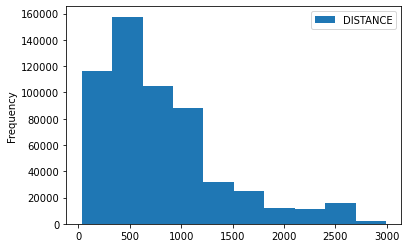

In [60]:
df.loc[df.DISTANCE < 3001][["DISTANCE"]].plot(kind='hist')
# df.loc[df.DISTANCE.max()]

In [67]:
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15',
       'DISTANCE', 'Date', 'day_name', 'WEEKDAY'],
      dtype='object')

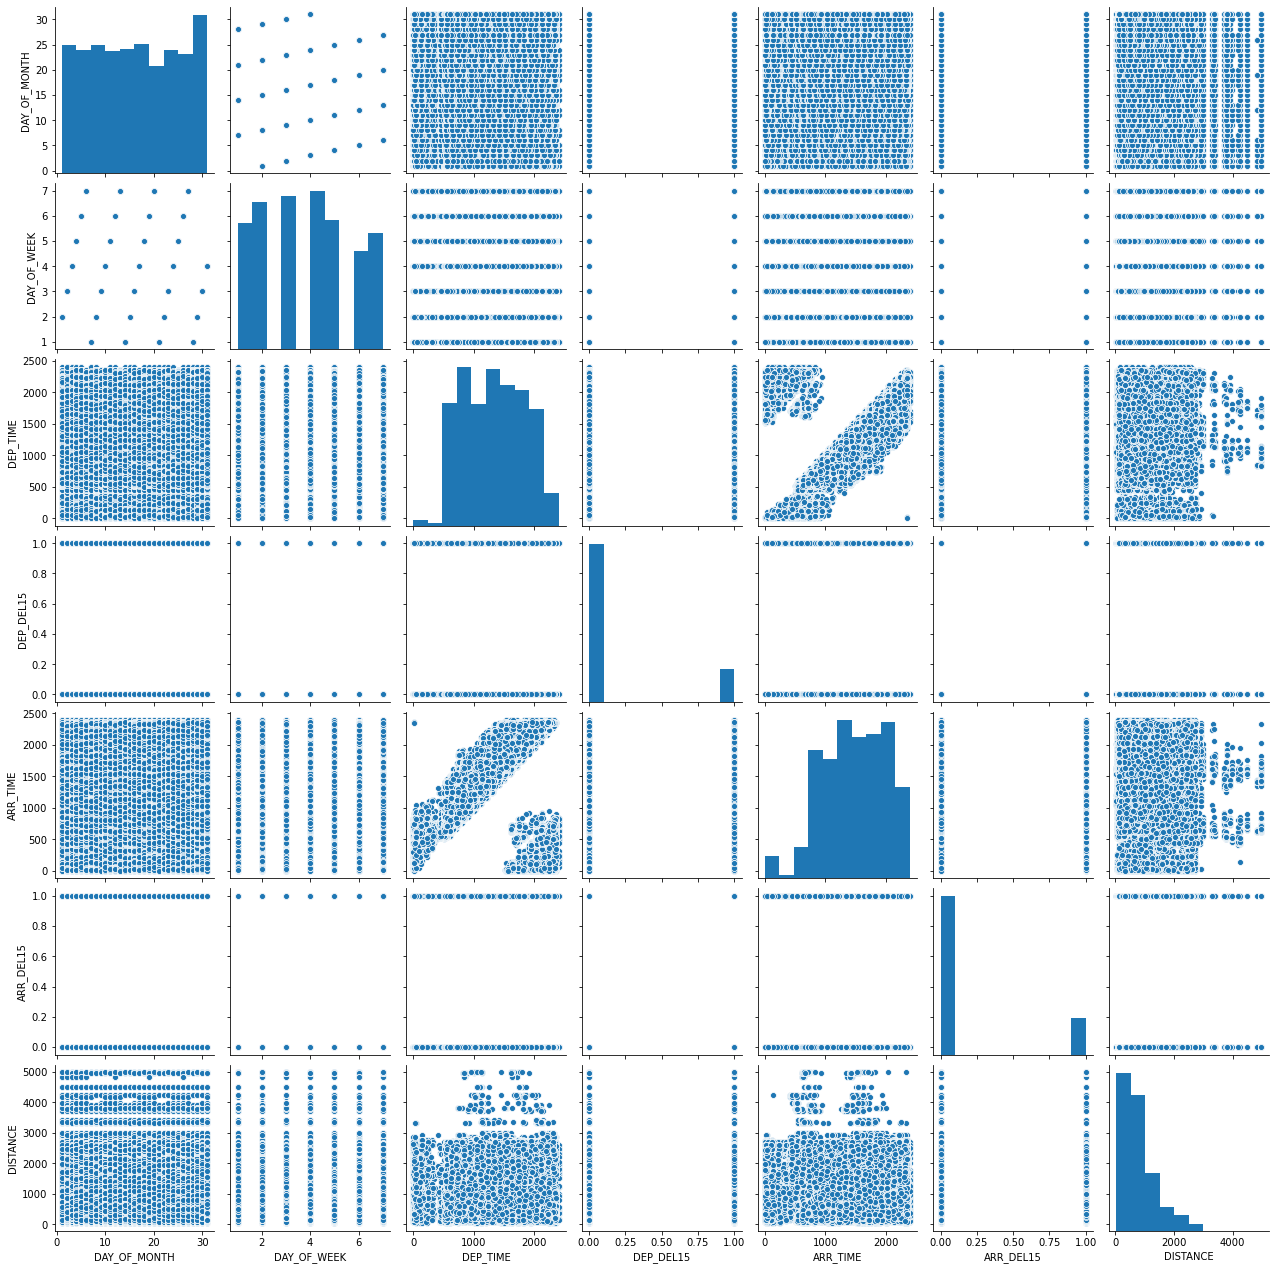

In [147]:
sns.pairplot(df)

<AxesSubplot:>

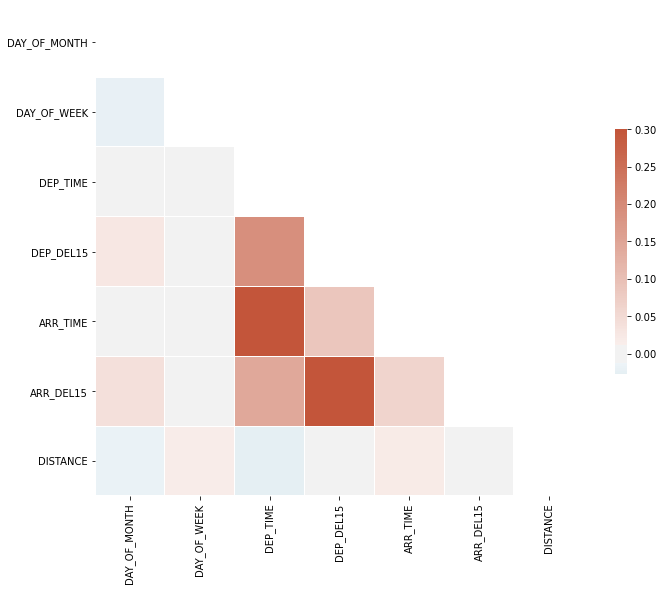

In [146]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

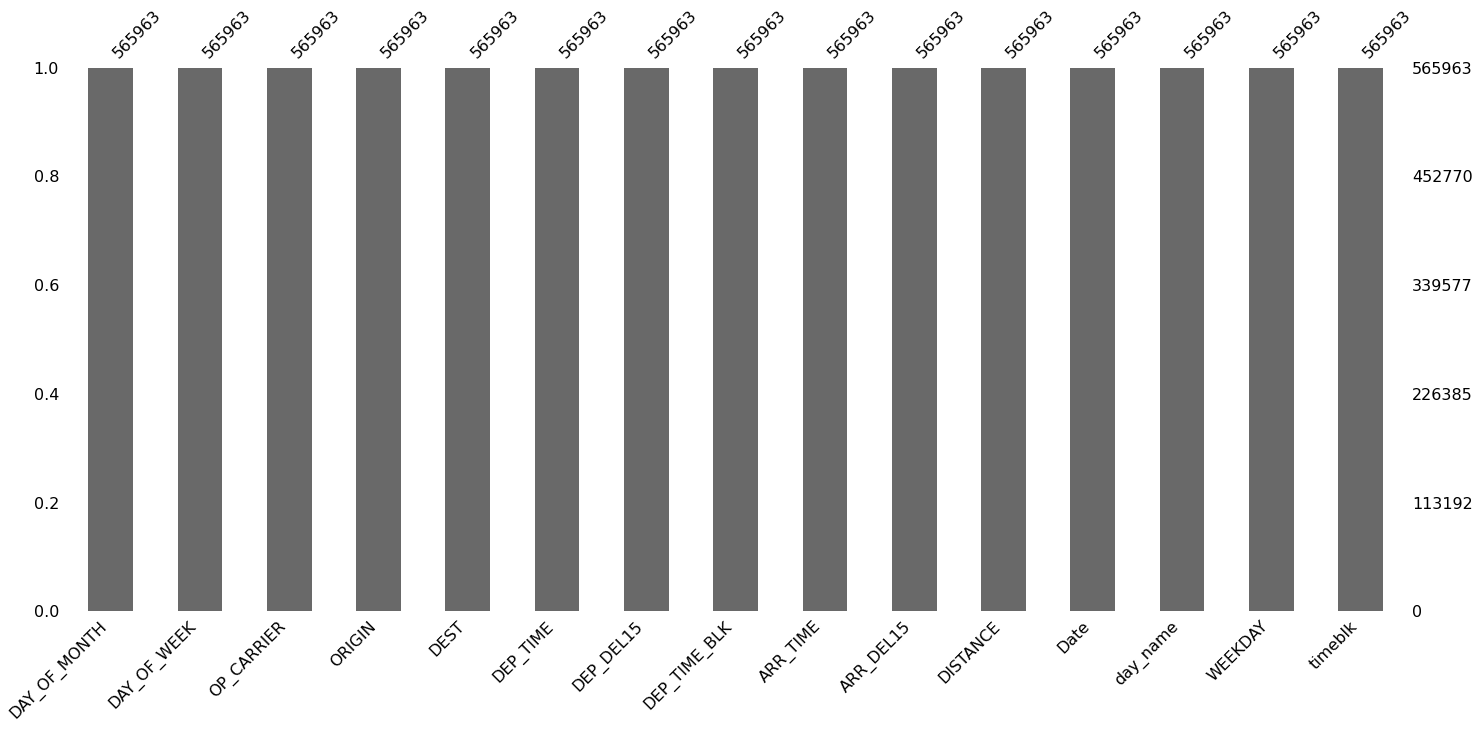

In [138]:
import missingno as msno
plt.figure(figsize=(4,4))
msno.bar(df)

In [140]:
# msno.heatmap(df) 

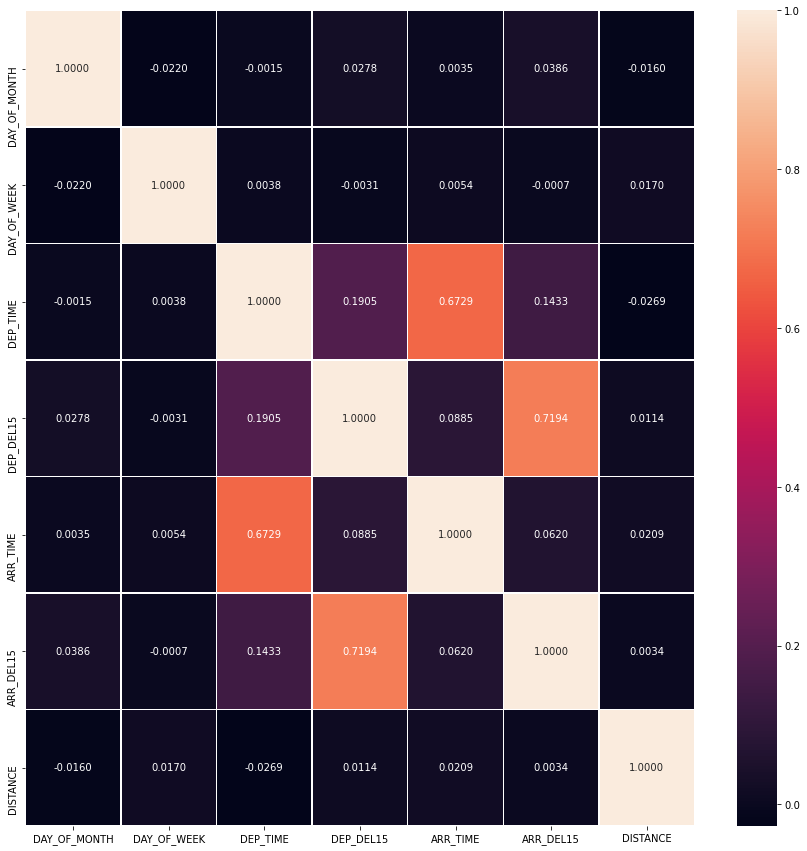

In [141]:
f, ax= plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.5,annot=True,fmt='.4f',ax=ax)
plt.show()

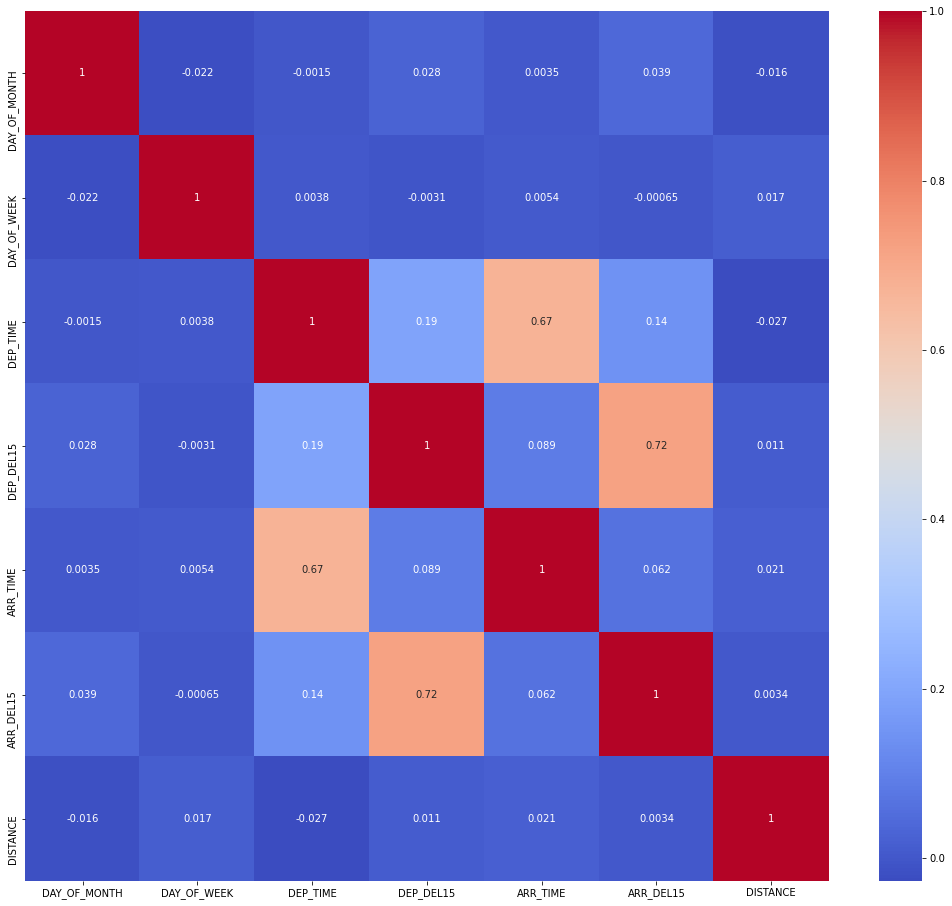

In [136]:
plt.figure(figsize = (18, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

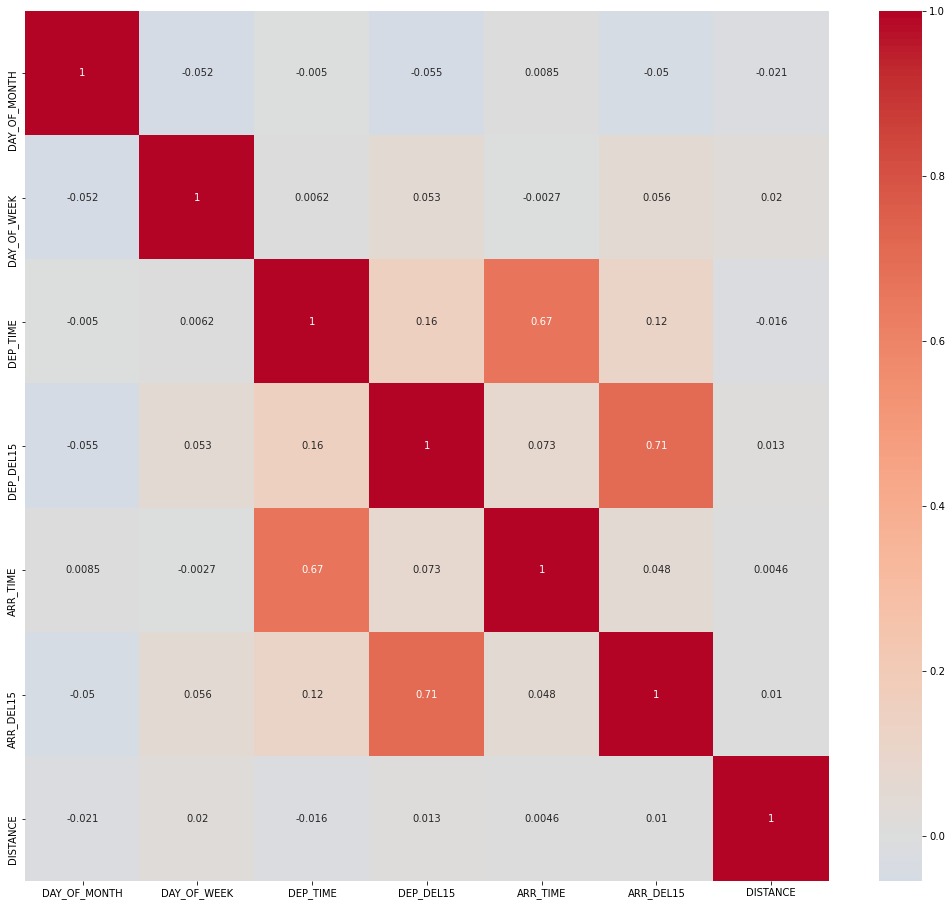

In [137]:
plt.figure(figsize = (18, 16))
sns.heatmap(df_20.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [184]:
from sklearn.metrics import plot_confusion_matrix

In [73]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [74]:
train, test = statsmodels_train_test_split(df)

In [101]:
# formula = 'DEP_DEL15 ~ DAY_OF_MONTH + C(OP_CARRIER) + DEP_TIME + ARR_TIME + C(WEEKDAY)' # not a good model
# formula = 'DEP_DEL15 ~ DAY_OF_MONTH + C(OP_CARRIER) + DEP_TIME + C(WEEKDAY)' 
formula = 'DEP_DEL15 ~ C(OP_CARRIER) + DEP_TIME + C(WEEKDAY)'


In [102]:
fitted_model = smf.logit(formula=formula, data=train, missing='drop').fit()

fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.432145
         Iterations 6


In [103]:
y_pred_test = np.round(fitted_model.predict(test))
y_pred_test

16906     0.0
230069    0.0
245253    0.0
42451     0.0
487846    0.0
         ... 
552561    0.0
125343    0.0
102116    0.0
426931    0.0
273173    0.0
Length: 141491, dtype: float64

In [104]:
confusion_matrix(test['DEP_DEL15'], y_pred_test)

array([[116761,    219],
       [ 24243,    268]])

In [188]:
# plot_confusion_matrix(fitted_model, test['DEP_DEL15'], y_pred_test, cmap='Blues', values_format='.3g')